In [2]:
import pandas as pd
import time
from datetime import datetime, timedelta

# Example data
data = {
    "timestamp": [
        "2024-08-05 23:01:52.165217",
        "2024-08-05 23:01:52.847882",
        "2024-08-05 23:01:53.323636",
    ],
    "base_id": [3, 3, 3],
    "target_id": [2.0, None, None],
    "sequence_number": [1, 1, 1],
    "event": ["range_poll", "TOF-ACK", "POS-ACK"],
    "time": [None, 682.641983, 1158.298969],
    "anchor_id": [99, 2, 2],
    "distance": [None, 27.9195, None],
    "pos_x": [None, None, 32.48],
    "pos_y": [None, None, -63.11],
    "anchor_label": ["NA", "NED - 2", "NED - 2"],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'timestamp' column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort DataFrame by timestamp just in case it's not sorted
df = df.sort_values(by='timestamp').reset_index(drop=True)

# Set the initial time for simulation
start_time = df['timestamp'].iloc[0]
current_time = start_time
end_time = df['timestamp'].iloc[-1]

# Define time step
dt = timedelta(seconds=0.1)

# Start the playback loop
data_index = 0
total_steps = int((end_time - start_time).total_seconds() / dt.total_seconds())

print("Starting data playback...")
for step in range(total_steps):
    if data_index < len(df) and current_time >= df['timestamp'].iloc[data_index]:
        # Get the current data row
        data_row = df.iloc[data_index]

        # Process the data (you can replace this print statement with your algorithm)
        print(f"At time {current_time}, processing data: {data_row.to_dict()}")

        # Move to the next data line
        data_index += 1

    # Simulate time passing
    current_time += dt
    time.sleep(dt.total_seconds())  # Simulate real time (remove or adjust for faster execution)

print("Data playback finished.")


Starting data playback...
At time 2024-08-05 23:01:52.165217, processing data: {'timestamp': Timestamp('2024-08-05 23:01:52.165217'), 'base_id': 3, 'target_id': 2.0, 'sequence_number': 1, 'event': 'range_poll', 'time': nan, 'anchor_id': 99, 'distance': nan, 'pos_x': nan, 'pos_y': nan, 'anchor_label': 'NA'}
At time 2024-08-05 23:01:52.865217, processing data: {'timestamp': Timestamp('2024-08-05 23:01:52.847882'), 'base_id': 3, 'target_id': nan, 'sequence_number': 1, 'event': 'TOF-ACK', 'time': 682.641983, 'anchor_id': 2, 'distance': 27.9195, 'pos_x': nan, 'pos_y': nan, 'anchor_label': 'NED - 2'}
Data playback finished.


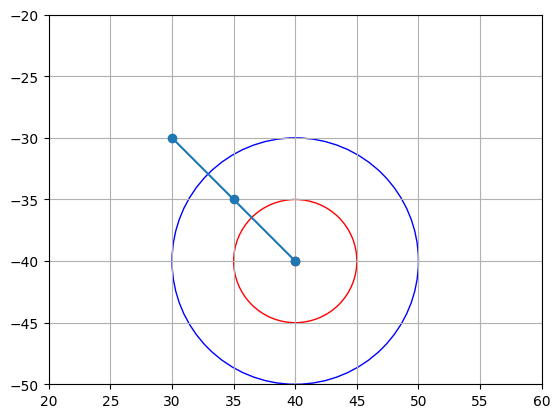

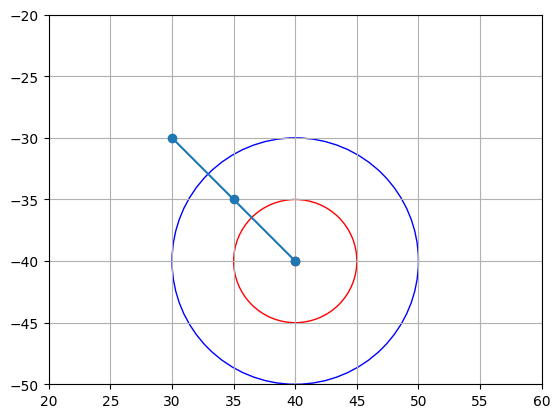

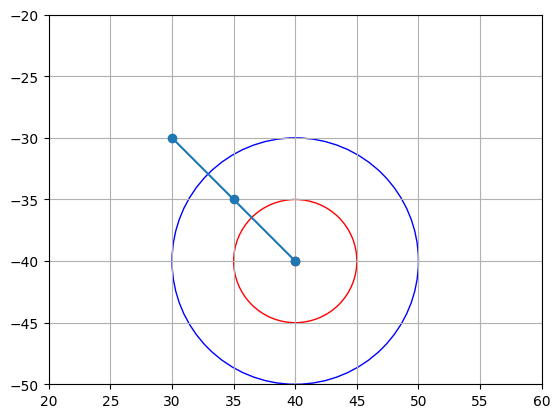

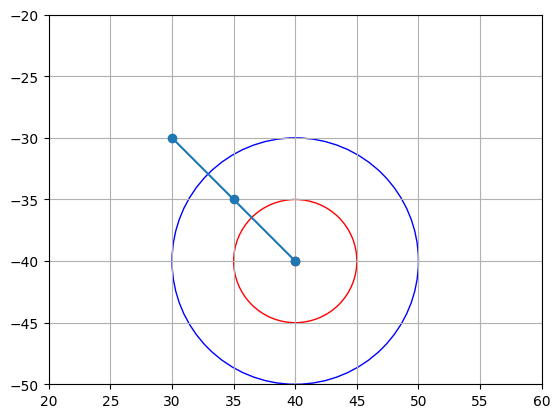

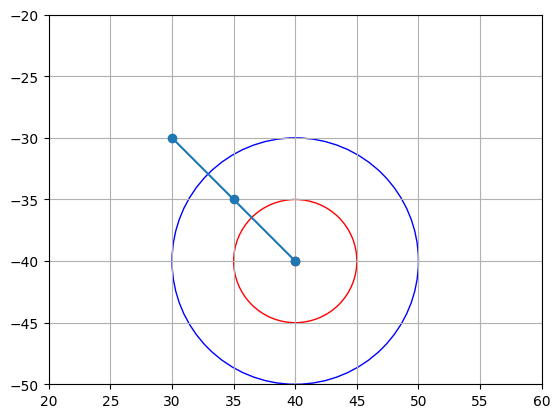

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example arrays (replace these with your actual data)
x_est_array = np.array([[30, -30], [35, -35], [40, -40]])  # Example estimated positions
anchor_pos3d = [40, -40]  # Example anchor position
z_meas = 5  # Example measurement radius
z_est_anchor = 10  # Example estimated anchor radius

# Set interactive mode
plt.ion()

# Plotting loop
for _ in range(5):  # Example loop
    # Create a new figure and axis
    fig, ax = plt.subplots()
    
    # Plot estimated positions
    ax.plot(x_est_array[:, 0], x_est_array[:, 1], marker='o', linestyle='-')
    
    # Plot anchor position
    ax.scatter(anchor_pos3d[0], anchor_pos3d[1], color='r')
    
    # Create and add circles
    c_meas = plt.Circle((anchor_pos3d[0], anchor_pos3d[1]), z_meas, color='r', fill=False)
    c_est = plt.Circle((anchor_pos3d[0], anchor_pos3d[1]), z_est_anchor, color='b', fill=False)
    ax.add_patch(c_meas)
    ax.add_patch(c_est)
    
    # Set axis limits
    ax.set_ylim((-50, -20))
    ax.set_xlim((20, 60))
    ax.set_aspect('equal', 'box')  # Maintain equal aspect ratio
    ax.grid(True)  # Show grid
    
    # Show the plot
    plt.draw()
    plt.pause(1)  # Pause to update plot in the loop
    
    # Close the figure to release memory
    plt.close(fig)
